# Utilities

In [5]:
import os, sys
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(parent_dir)

In [61]:
import matplotlib.pyplot as plt
import numpy as np

class Analyzer:
    
    def __init__(self, network):
        self.network = network
        
    def get_degree_distribution(self):
        "Returns the plot of the degree distribution with a log-log scale"
        
        N = self.network.number_of_nodes()
        degrees = [self.network.in_degree(n) for n in self.network.nodes()] if self.network.is_directed() else [self.network.degree(n) for n in self.network.nodes()]
        
        N_k = {}
        for k in degrees:
            if k not in N_k:
                N_k[k] = 1
            else:
                N_k[k] += 1
                
        p_k = {}
        for k in N_k:
            p_k[k] = N_k[k] / N
        
        # Plotting in log-log scale
        plt.figure(figsize=(8, 6))
        plt.loglog(list(p_k.keys()), list(p_k.values()), marker='o', linestyle='None', color='b')
        plt.title('Log-log Degree Distribution')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        return plt

# Random Graphs

In [ ]:
from networks_gen import randomG
import random

n = 25000

# take p randomly between 1/24999 and 1
p = random.uniform(1/(n-1), 0.01)

g1 = randomG(n, p)
analyzer_g1 = Analyzer(g1)
plt = analyzer_g1.get_degree_distribution()
plt.show()

In [ ]:
print(len(g1.edges()))
print(len(g1.nodes()))

In [ ]:
# save the graph
print(p)

In [ ]:
# save the graph
print(stream_diam(g1))

# Configuration model

In [ ]:
import networkx as nx
import numpy as np

degree_distribution = [d for _, d in G.degree()]

min = np.min(degree_distribution)
max = np.max(degree_distribution)

# normalize the degree distribution beteen 0 and max - min
normalized_degree_distribution = [d - min for d in degree_distribution]

if np.sum(normalized_degree_distribution) % 2 != 0:
    normalized_degree_distribution[0] += 1

# Generate the small graph
small_graph = nx.configuration_model(normalized_degree_distribution[:3000])

# Compute the degree distribution of the small graph
analyzer_g2 = Analyzer(small_graph)
plt = analyzer_g2.get_degree_distribution()
plt.show()

In [ ]:
nx.draw_networkx(small_graph, with_labels=False, linewidths=0.01, node_size=1, width=0.1)
plt.show()

# Preferential Attachment

In [ ]:
from networks_gen import preferentialG
import random

# generate a preferential graph for n = 25000 and different values of p (between 0 excluded and 1 included) and plot the degree distribution for each graph
n = 25000

ps = [0.01, 0.1, 0.5, 0.7, 1]

# take p randomly between 1/24999 and 1
for p in ps:
    g2 = preferentialG(n, p)
    analyzer_g2 = Analyzer(g2)
    print(len(g2.edges()))
    plt = analyzer_g2.get_degree_distribution()
    plt.show()

# Generalized Watts-Strogatz

In [ ]:
import networkx as nx
import numpy as np
from networks_gen import GenWS2DG

# degree_distribution = [d for _, d in G.degree()]

# min = np.min(degree_distribution)
# max = np.max(degree_distribution)

# # normalize the degree distribution beteen 0 and max - min
# normalized_degree_distribution = [d - min for d in degree_distribution]

# normalized_degree_distribution = normalized_degree_distribution[:3000]

# if np.sum(normalized_degree_distribution) % 2 != 0:
#     normalized_degree_distribution[-1] += 1

# Generate the small graph
small_graph = GenWS2DG(2500, 1, 1000, 1)

# Compute the degree distribution of the small graph
analyzer_g2 = Analyzer(small_graph)
plt = analyzer_g2.get_degree_distribution()
plt.show()

# Affiliation Networks

In [384]:
import networkx as nx

G = nx.read_edgelist('net_2', nodetype=int)

In [386]:
# produce label.txt file for the graph
# Input file name for node names (Node ID, Node label)

# create labels.txt file
with open('labels.txt', 'w') as f:
    for node in G.nodes():
        f.write(str(node) + '\n')

In [378]:
from networks_gen import affiliationG

G = affiliationG(100, 4, 1, 4, 0.5, 10)

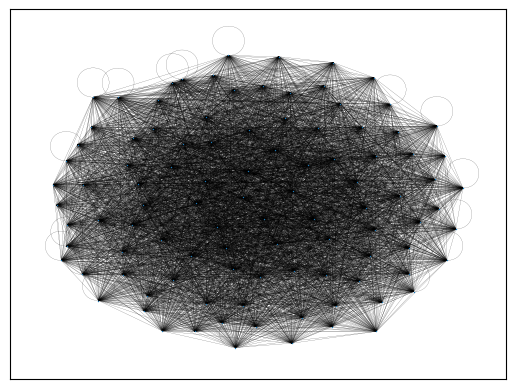

In [379]:
# draw only the nodes of the network
nx.draw_networkx(G, with_labels=False, linewidths=0.01, node_size=1, width=0.1)


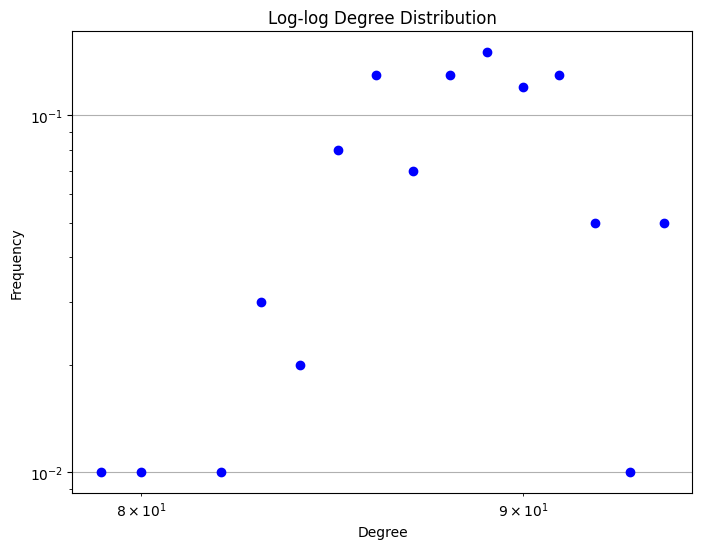

In [380]:
analyzer = Analyzer(G)
plt = analyzer.get_degree_distribution()
plt.show()

In [381]:
import numpy as np
import math

n = len(G.nodes())
m = 4
learning_rate = 0.0001
max_iter = 1000

gradient = np.zeros((n, m))

F = np.random.rand(n, m)
sum_v = np.sum(F, axis=0)

def log_likelihood(u, F, G, sum_v):
    
    sum_1 = np.zeros(m)
    for v in G.neighbors(u):
        dot_product = np.dot(F[u], np.transpose(F[v]))
        denominator = 1 - math.exp(-dot_product)
        sum_1 += (F[v] * np.exp(-dot_product) / denominator)

    sum_2 = sum_v - F[u] - np.sum(F[list(G.neighbors(u))], axis=0)

    return sum_1 - sum_2

def coordinate_gradient_ascent(log_likelihood, F, G, sum_v, learning_rate, max_iter):
    
    n, m = F.shape

    while max_iter > 0:
        
        tot_gradient = np.zeros(m)
        new_F = np.zeros((n, m))
        
        for u in range(n):
            gradient_u = log_likelihood(u, F, G, sum_v)
            tot_gradient += gradient_u
            new_F[u] = F[u] + learning_rate * gradient_u
            new_F[u] = np.maximum(new_F[u], 0)
            
        F = new_F
        sum_v = np.sum(F, axis=0)
        
        max_iter -= 1
        
        if np.sum(np.abs(tot_gradient)) < 0.0001:
            break

    return F

updated_F = coordinate_gradient_ascent(log_likelihood, F, G, sum_v, learning_rate, max_iter)
print("Final Result:")
print(updated_F)

Final Result:
[[0.43885076 1.02763591 0.96084766 0.17096834]
 [0.74909723 1.00875164 0.95822255 0.95056996]
 [0.80642911 0.37787318 0.65912808 0.73817164]
 [0.75235383 0.84533435 0.70641648 0.97851548]
 [0.50841585 0.83619269 0.53153549 1.1004553 ]
 [0.66224057 0.58018786 0.9172639  0.63153349]
 [0.61190662 0.87006103 0.37008567 0.64067668]
 [0.80802427 0.27914353 0.97488926 0.75587767]
 [0.55006489 0.43977582 0.56514826 1.23746527]
 [0.7310814  0.95846012 1.24024747 0.76249078]
 [0.97575028 0.8945124  0.89313465 0.5847362 ]
 [0.54986506 1.4547706  1.06354709 0.5802464 ]
 [0.34310538 0.89564431 1.31021138 0.48504986]
 [0.23814936 0.98111809 0.75872162 0.91275534]
 [0.64160611 0.97513642 0.4720554  1.23506037]
 [0.56867443 1.04786241 0.65726409 0.70237013]
 [1.07964498 0.97763566 1.11310699 0.18530254]
 [0.88916977 0.78044647 1.00202503 0.        ]
 [0.79898766 0.68305178 1.19233202 0.35426367]
 [0.35031314 0.91168629 0.50308689 1.16025217]
 [0.79019295 0.78842427 0.45154949 1.2030813 ]

## Find c

In [382]:
# 25 percent of the mean
mean = np.mean(updated_F)
tf_mean = mean * 0.25

affiliations = {}
for u in range(n):
    affiliations[u] = [i for i in range(m) if updated_F[u][i] > mean]
    
print(affiliations)

# mean length of the communities
mean_length = np.mean([len(affiliations[u]) for u in affiliations])
print(mean_length)

{0: [1, 2], 1: [0, 1, 2, 3], 2: [0], 3: [0, 1, 3], 4: [1, 3], 5: [2], 6: [1], 7: [0, 2, 3], 8: [3], 9: [1, 2, 3], 10: [0, 1, 2], 11: [1, 2], 12: [1, 2], 13: [1, 2, 3], 14: [1, 3], 15: [1], 16: [0, 1, 2], 17: [0, 1, 2], 18: [0, 2], 19: [1, 3], 20: [0, 1, 3], 21: [1, 3], 22: [0, 2], 23: [0, 2], 24: [1, 2], 25: [0, 1], 26: [2, 3], 27: [1, 2], 28: [3], 29: [1, 2], 30: [2, 3], 31: [2], 32: [1, 2, 3], 33: [1, 2], 34: [2, 3], 35: [1, 3], 36: [1, 3], 37: [0, 2], 38: [2, 3], 39: [3], 40: [0, 1], 41: [1], 42: [0, 2], 43: [0, 2], 44: [0, 3], 45: [1, 3], 46: [1, 2], 47: [1, 2], 48: [1], 49: [1, 3], 50: [3], 51: [3], 52: [0, 3], 53: [1, 2], 54: [1, 3], 55: [1], 56: [1, 3], 57: [0, 1, 3], 58: [0, 1], 59: [1, 3], 60: [2, 3], 61: [2, 3], 62: [0, 1, 3], 63: [1], 64: [0, 2], 65: [1], 66: [1], 67: [0, 1, 3], 68: [1, 2], 69: [0, 1, 3], 70: [1, 3], 71: [0, 1], 72: [1, 3], 73: [0, 1, 2], 74: [0, 2, 3], 75: [1, 2], 76: [0, 1], 77: [0, 2, 3], 78: [2], 79: [0, 2], 80: [1, 2], 81: [1, 3], 82: [0, 1], 83: [0, 2,

## Find m

In [383]:
# find the number of communities given the matrix updated_F containing the affiliation degree of each node to each community
# the number of communities is not necessarily equal to m, since some communities may be empty
def find_number_of_communities(updated_F):
    # for each col take the number of non zero elements
    elems = np.zeros(m)
    for i in range(m):
        elems[i] = np.count_nonzero(updated_F[:, i])
    return elems
    
num_elems = find_number_of_communities(updated_F)
mean = np.mean(num_elems)
# count the number of communities whose num_elems is greater than the mean
num_communities = np.count_nonzero(num_elems > mean)
print(num_communities)

2


In [399]:
G = affiliationG(100, 4, 0.2, 3, 0.1, 5)

# Write edge list to a file using tab as separator
with open('try', 'w') as f:
    for edge in G.edges():
        f.write(str(edge[0]) + '\t' + str(edge[1]) + '\n')

import pandas as pd 

df = pd.DataFrame(columns=['node_id', 'node_label'])
df['node_id'] = list(G.nodes())

# create labels.txt file
with open('labels.txt', 'w') as f:
    for node in G.nodes():
        f.write(str(node) + '\t\n')
